In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import quad

In [2]:
def system1(Y, t, alpha=0., R=1.) :
    r1, r2 = Y
    if r1 > 1e-4 and r2 > 1e-4 :
        dr1dt = R*(1./(r1*r2) - 1./r1**2) + alpha
        dr2dt = R*(1./(r1*r2) - 1./r2**2) + alpha
        dYdt = [dr1dt, dr2dt]
    else :
        dYdt = [0., 0.]
    return dYdt

def system2(Y, t, alpha=0., R=1.) :
    rho, del_rho = Y
    if rho < 1e5 :
        drhodt    = alpha*rho - R*(4.*del_rho / (rho**2 - del_rho**2))**2
        d_drho_dt = alpha*del_rho + R*(16.*rho*del_rho / ((rho**2 - del_rho**2)**2))
        dYdt = [drhodt, d_drho_dt]
    else :
        dYdt = [0., 0.]
    return dYdt
    

In [3]:
alpha, R = 10., 1.
tmax = 1.
t = np.linspace(0., tmax, 241)
r0 = 1.
delta_r0 = 1e-1
r0_1, r0_2 = r0+delta_r0, r0

In [4]:
Y0 = [r0_1, r0_2]
sol1 = odeint(system1, Y0, t, args=(alpha, R))

r1, r2 = sol1[:, 0], sol1[:, 1]


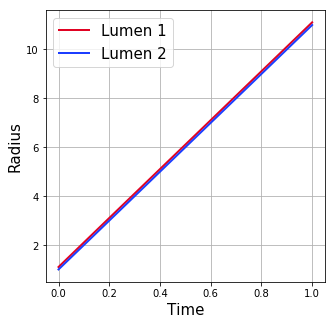

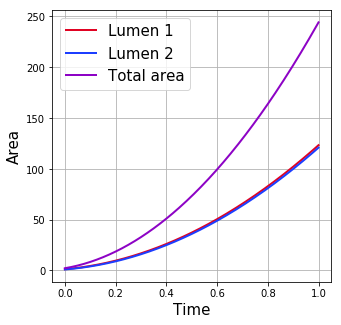

In [5]:
plt.figure(figsize = (5, 5))
plt.plot(t, r1, label = 'Lumen 1', linewidth=2, linestyle = '-', color = '#E00323')
plt.plot(t, r2, label = 'Lumen 2', linewidth=2, linestyle = '-', color = '#1C3EFF')
plt.legend(fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Radius', fontsize = 15)
plt.grid()
plt.show()

plt.figure(figsize = (5, 5))
plt.plot(t, r1**2, label = 'Lumen 1', linewidth=2, linestyle = '-', color = '#E00323')
plt.plot(t, r2**2, label = 'Lumen 2', linewidth=2, linestyle = '-', color = '#1C3EFF')
plt.plot(t, r1**2+r2**2, label = 'Total area', linewidth=2, linestyle = '-', color = '#8D03C5')
plt.legend(fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Area', fontsize = 15)
plt.grid()
plt.show()

#plt.figure(figsize = (5, 5))
#plt.xscale('log')
#plt.yscale('log')
#plt.plot(t, R*(r1-r2) / (r1*r2**3) > 0)
#plt.legend(fontsize = 15)
#plt.xlabel('Time', fontsize = 15)
#plt.ylabel('dx/dy', fontsize = 15)
#plt.grid()
#plt.show()

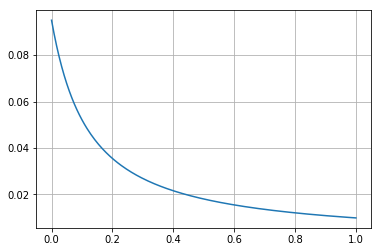

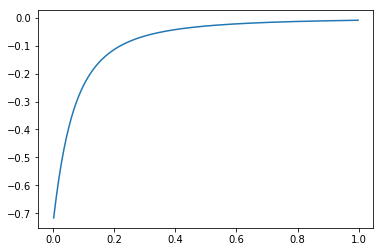

In [6]:
beta = (r1**2-r2**2)/(r1**2+r2**2)
plt.plot(t, beta)
plt.grid()
plt.show()

dbdt = (beta[1:] - beta[:-1]) / (t[1:]-t[:-1])
plt.plot(t[:-1]+0.5*(t[1:]-t[:-1]), dbdt)
plt.show()

In [303]:
def dxdy(x, y, alpha, R) :
    num = 1 / (x*y) - 1/x**2 + alpha*x/R
    denum = 1 / (x*y) - 1/y**2 + alpha*y/R
    return num/denum

In [189]:
def area_syst(Y, t, R, alpha) :
    a1, a2 = Y
    if a1 > 1e-6 and a2 > 1e-6 :
        dAdt = [R/a2 - R/a1 + alpha*np.sqrt(a1), R/a1 - R/a2 + alpha*np.sqrt(a2)]
    else :
        dAdt = [0., 0.]
    return dAdt

In [222]:
Y0 = [r0_1**2, r0_2**2]

sol2 = odeint(area_syst, Y0, t, args=(R, alpha))

a1, a2 = sol2[:, 0], sol2[:, 1]


362.3949149951919

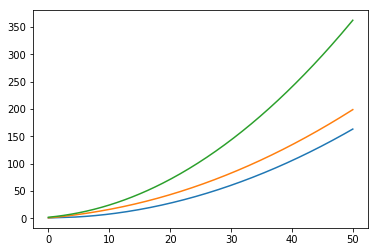

In [223]:
plt.plot(t, a1)
plt.plot(t, a2)
plt.plot(t, a1+a2)
np.max(a1+a2)

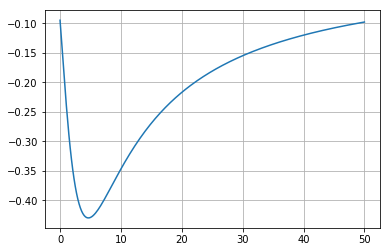

In [224]:
plt.plot(t, (a1-a2)/(a1+a2))
plt.grid()

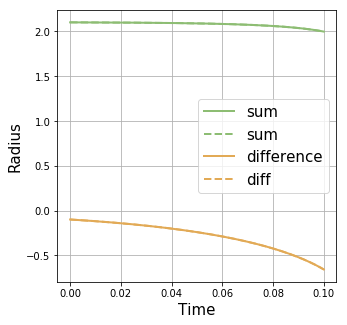

In [101]:
plt.figure(figsize = (5, 5))
plt.plot(t, rho, label = 'sum', linewidth=2, linestyle = '-', color = '#8DBD73')
plt.plot(t, r1+r2, label = 'sum', linewidth=2, linestyle = '--', color = '#8DBD73')
plt.plot(t, delta_rho, label = 'difference', linewidth=2, linestyle = '-', color = '#E2AA56')
plt.plot(t, r1-r2, label = 'diff', linewidth=2, linestyle = '--', color = '#E2AA56')
plt.legend(fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Radius', fontsize = 15)
plt.grid()
plt.show()
